In [2]:
from qiskit import *
from qiskit.extensions import *
from qiskit.visualization import plot_histogram 
import numpy as np 
from qiskit.quantum_info import Statevector, random_statevector
from qiskit import QuantumCircuit
from math import sqrt
np.set_printoptions(suppress=True,precision=2) 
backend = Aer.get_backend('qasm_simulator')
import time

In [3]:
## converts number into 5 digit binary, must be numbers between [0, 31]
def binary(num, size):
    maxi = 2**size - 1
    if(num < 0 or num > maxi):
        raise ValueError("Number should not be less than 0 or greater than " +str(maxi))
    else:
        binNum = (bin(num))[2:]
        ## want to make number a five digit binary number
        buffer = size-(len(binNum))
        binArr = '0'*buffer+binNum
        return binArr
# binary(0,2)
# binary(0, 5)
# binary(31, 5)
#binary(31, 2)

In [4]:
## converts a number that is in a string in binary form to a integer
def bin2decimal(num):
    decimalNum = 0
    for i in range(len(num)-1, -1, -1):
        decimalNum += int(num[i])*2**(len(num)-1-i)
    return decimalNum

#bin2decimal('001')

In [5]:
## how many bits we need to represent the max number (n)
## will be equivalent to how many wire we are going to put this state on
## creates a superposition of the numbers in the training set along with the labels
def superposition(data, n):
    sv = Statevector.from_label(binary(data[0], n))
    sumb = 0
    for i in range(1,len(data)):
        sv += Statevector.from_label(binary(data[i], n))
    for state, amp in enumerate(sv.data):
        if not np.isclose(amp, 0):
            sumb += amp**2
    sv *= 1/sqrt(sumb.real)
    #print(sv)
    return sv

In [6]:
## creates the circuit that is used to calculate the distance between the test points and the training data
def distCal(circ, qa, qx):
    for i in range(len(qa)):
        circ.cx(qa[i], qx[i])
    circ.barrier()
    circ.x(qx)

In [7]:
# Generate all boolean combinations of size m
def generate (m): 
    if (m == 0) :
        yield "" 
    else :
        for b in ['0','1'] :
            for c in generate(m-1) :
                yield b + c 

# Matrix from function
def fun2mat (fun, dim) : 
    """
    Example:
        fun2mat (lambda a : (a + 1) % 5, 5)
        [[0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0],
         [0, 1, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 0, 1, 0]]
    """
    
    return [ [ int(fun(c) == r) for c in range(dim) ] for r in range(dim)]

# Circuit fragment for input
def inputFragment (g, vals) : 
    n = len(vals)
    for idx, val in list(enumerate(vals)): 
        if val == '1' : g.x((n-idx)-1)
    g.barrier()
    
# Circuit fragment for measurement
def measureFragment (g) : 
    g.barrier()
    g.measure_all()
    job = backend.run(assemble(g), shots=1, memory=True) 
    output = job.result().get_memory()[0]
    return output


def hamming(num):
    count = 0
    for i in num:
        if i == '1':
            count += 1
    return count

def func(x, n, t, size):
    if hamming(binary(x,n)[-size:]) >= size - t:
        return (bin2decimal(str(1^int(binary(x,n)[0])) + binary(x, n)[1:]))
    else:
        return (bin2decimal(str(0^int(binary(x,n)[0])) + binary(x, n)[1:]))

In [8]:
# ## ignore duplicates points (x, y) as part of preprocessing
# ## class o is represented with 0 and class * with 1

# datax = [1, 0, 2, 1]
# datay = [1, 0, 2, 2]
# labels = [1, 0, 0, 0]

datax = [0,0,0,0,1,1,1,1,2,2,2,3,3,3,3]
datay = [0,1,2,3,0,1,2,3,0,1,3,0,1,2,3]
labels = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0]

testPointx = bin2decimal('1010')

n = 4
t = 2

In [9]:
## for speed creating matrix for unitary function before hand
t = 2
n = 4
totalwires = 2*n+1
mat = fun2mat(lambda x: func(x, totalwires, t, n),2**totalwires)
print(mat)

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
def uf(circ, totalwires, t, n):
## how you would run it without premaking matrix for the specific case
#    circ.unitary(fun2mat(lambda x: func(x, totalwires, t, n),2**totalwires), range(totalwires))

## making matrix before running circuit to see speed without overhead of making it
    circ.unitary(mat, range(totalwires))

In [11]:
def qknn(n, t, xi, training):
    #m = len(bin(t)) - 2
    ## test point
    qx = QuantumRegister(n, "qx")
    ## data
    qa = QuantumRegister(n+1, "qa")
    ## labels
    #qb = QuantumRegister(1, "qb")
    qt = QuantumRegister(n, "qt")
    qanc = QuantumRegister(1, "qanc")
    cx = ClassicalRegister(n, "cx")
    ca = ClassicalRegister(n+1, "ca")
    #cb = ClassicalRegister(1, "cb")
    ct = ClassicalRegister(n, "ct")
    canc = ClassicalRegister(1,  "canc")
    
    circ = QuantumCircuit(qx, qt, qanc, qa, cx, ct, canc, ca)
    circ.reset(range(3*n+1+1))
    
    ####### add input for test point
    testpoint = binary(xi, n)[::-1]
    for i in range(len(testpoint)):
        if testpoint[i] == '1':
            circ.x(qx[i])
    tpoint = binary(t, n)[::-1]
    for i in range(len(testpoint)):
        if tpoint[i] == '1':
            circ.x(qt[i])

    sv = superposition(training, n+1)
    circ.initialize(sv.data, qa)
    circ.barrier()
    
    distCal(circ, qa[:-1], qx)
    circ.barrier()
    uf(circ, 2*n + 1, t, n)
    #hammingDist(circ, qx, qt, qanc)
    circ.barrier()

    circ.measure(qx, cx)
    circ.measure(qa, ca)
    circ.measure(qt, ct)
    circ.measure(qanc, canc)
#     sv1 = Statevector.from_label('01');
#     sv2 = Statevector.from_label('11')
#     projector = sv1.to_operator()
#     projector2 = sv2.to_operator()
#     pro = projector + projector2
    
    job = backend.run(assemble(circ), shots=1000, memory=True)
#plot_histogram(job.result().get_counts())
    output = job.result().get_memory()[0]
    return circ, output

In [12]:
fx = lambda x, y: [bin2decimal(binary(x[i], 1) + binary(y[i], n)) for i in range(len(x))]
training = fx(labels, datax)
# fxy = lambda x, y, z: [bin2decimal(binary(x[i], 1) + binary(y[i], int(n/2)) + binary(z[i], int(n/2))) for i in range(len(x))]
# training = fxy(labels, datax, datay)

circ, output = qknn(n, t, testPointx, training)
print('Gives output', output)
display(circ.draw())
print('\n')

/usr/local/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


Gives output 10001 0 0010 0100


»
  qx_0: ─|0>─»
             »
  qx_1: ─|0>─»
             »
  qx_2: ─|0>─»
             »
  qx_3: ─|0>─»
             »
  qt_0: ─|0>─»
             »
  qt_1: ─|0>─»
             »
  qt_2: ─|0>─»
             »
  qt_3: ─|0>─»
             »
qanc_0: ─|0>─»
             »
  qa_0: ─|0>─»
             »
  qa_1: ─|0>─»
             »
  qa_2: ─|0>─»
             »
  qa_3: ─|0>─»
             »
  qa_4: ─|0>─»
             »
  cx: 4/═════»
             »
  ct: 4/═════»
             »
canc: 1/═════»
             »
  ca: 5/═════»
             »
«                                                                                                                »
«  qx_0: ────────────────────────────────────────────────────────────────────────────────────────────────────────»
«                                                         ┌───┐                                                  »
«  qx_1: ─────────────────────────────────────────────────┤ X ├──────────────────────────────────────────────────»
«                                                         └───┘                                                  »
«  qx_2: ────────────────────────────────────────────────────────────────────────────────────────────────────────»
«                                                         ┌───┐                                                  »
«  qx_3: ─────────────────────────────────────────────────┤ X ├──────────────────────────────────────────────────»
«                                                         └───┘                                                  »
«  qt_0: ────────────────────────────────────────────────────────────────────────────────────────────────────────»
«                                                         ┌───┐                                                  »
«  qt_1: ─────────────────────────────────────────────────┤ X ├──────────────────────────────────────────────────»
«                                                         └───┘                                                  »
«  qt_2: ────────────────────────────────────────────────────────────────────────────────────────────────────────»
«                                                                                                                »
«  qt_3: ────────────────────────────────────────────────────────────────────────────────────────────────────────»
«                                                                                                                »
«qanc_0: ────────────────────────────────────────────────────────────────────────────────────────────────────────»
«        ┌──────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«  qa_0: ┤0                                                                                                     ├»
«        │                                                                                                      │»
«  qa_1: ┤1                                                                                                     ├»
«        │                                                                                                      │»
«  qa_2: ┤2 Initialize(0,0,0.39736,0.52981,0,0,0,0,0,0,0,0,0,0,0,0,0.52981,0.52981,0,0,0,0,0,0,0,0,0,0,0,0,0,0) ├»
«        │                                                                                                      │»
«  qa_3: ┤3                                                                                                     ├»
«        │                                                                                                      │»
«  qa_4: ┤4                                                                                                     ├»
«        └──────────────────────────────────────────────────────────────────────────────────────────────────────┘»
«  cx: 4/════════════════════════════════════════════════════════════════════════════════════════════════════════»
«       

## Classical Implementation of KNN

In [13]:
from random import choice

def cknn(training, labels, testpoint, t, n):
    counto = 0
    countx = 0
    for i in range(len(training)):
        elm = bin2decimal(training[i])
        exor = elm^testpoint
        ham = hamming(binary(exor, n))
#         print(elm, testpoint, exor, ham)
        if(ham <= t):
            if(labels[i]==1):
                countx+=1
            else:
                counto+=1
#     print(countx)
#     print(counto)
    if(countx > counto):
        return 1
    elif (counto < countx):
        return 0
    else:
        return choice([0, 1])

In [14]:
# datax = [0, 1, 2, 5, 6, 7]
# labels = [0, 1, 0, 1, 0, 1]
# testPointx = 3
# t = 1
# n = 3

startC = time.time()
fxy = lambda x, y: [binary(x[i], int(n/2)) + binary(y[i], int(n/2)) for i in range(len(x))]
training = fxy(datax, datay)

cknn(training, labels, testPointx, t, n)
endC=time.time()
elaspedC = endC-startC
print(elaspedC)

0.0005159378051757812


## Comparison with smaller training set

The time elasped is: 0.07082009315490723


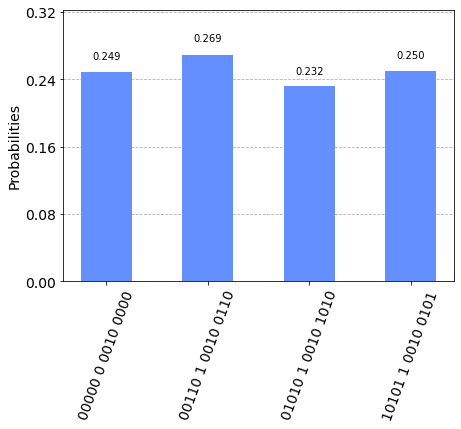

In [28]:
## ignore duplicates points (x, y) as part of preprocessing
datax = [1, 0, 2, 1]
datay = [1, 0, 2, 2]
## class o is represented with 0 and class * with 1
labels = [1, 0, 0, 0]
testPointx = bin2decimal('1111')

start=time.time()
xi = testPointx ## point 3,3
# xi = 3

#fx = lambda x, y: [bin2decimal(binary(x[i], 1) + binary(y[i], n)) for i in range(len(x))]
#training = fx(labels, datax)
fxy = lambda x, y, z: [bin2decimal(binary(x[i], 1) + binary(y[i], 2) + binary(z[i], 2)) for i in range(len(x))]
training = fxy(labels, datax, datay)

#m = len(bin(t)) - 2
## test point
qx = QuantumRegister(n, "qx")
## data
qa = QuantumRegister(n+1, "qa")
## labels
#qb = QuantumRegister(1, "qb")
qt = QuantumRegister(n, "qt")
qanc = QuantumRegister(1, "qanc")
cx = ClassicalRegister(n, "cx")
ca = ClassicalRegister(n+1, "ca")
#cb = ClassicalRegister(1, "cb")
ct = ClassicalRegister(n, "ct")
canc = ClassicalRegister(1,  "canc")


circ = QuantumCircuit(qx, qt, qanc, qa, cx, ct, canc, ca)
circ.reset(range(3*n+1+1))

####### add input for test point
testpoint = binary(xi, n)[::-1]
for i in range(len(testpoint)):
    if testpoint[i] == '1':
        circ.x(qx[i])
tpoint = binary(t, n)[::-1]
for i in range(len(testpoint)):
    if tpoint[i] == '1':
        circ.x(qt[i])

sv = superposition(training, n+1)
circ.initialize(sv.data, qa)
circ.barrier()

distCal(circ, qa[:-1], qx)
circ.barrier()
uf(circ, 2*n + 1, t, n)
#hammingDist(circ, qx, qt, qanc)
circ.barrier()

# circ.x(qanc)
circ.barrier()

circ.measure(qanc, canc)
circ.measure(qa, ca)
circ.measure(qt, ct)
circ.measure(qx, cx)

job = backend.run(assemble(circ), shots=1000, memory=True)
end=time.time()
elasped = end-start
print("The time elasped is:", elasped)
plot_histogram(job.result().get_counts())

## To explain graph above
The 8th bit (from top to bottom) is the bit you want to collapse the superposition on so that your left a superposition of points with only 1 in that position. The bottom bit is the classification of the bit. So after you collapse the super position, you would look at the bottom bit and the majority you got from that would be your classification of the new test point.

In [25]:
## ignore duplicates points (x, y) as part of preprocessing
datax = [1, 0, 2, 1]
datay = [1, 0, 2, 2]
## class o is represented with 0 and class * with 1
labels = [1, 0, 0, 0]
testPointx = bin2decimal('1111')

startC = time.time()
fxy = lambda x, y: [binary(x[i], int(n/2)) + binary(y[i], int(n/2)) for i in range(len(x))]
training = fxy(datax, datay)

print("The classification is:", cknn(training, labels, testPointx, t, n))
endC=time.time()
elaspedC = endC-startC
print("The time elasped is:", elaspedC)

The classification is: 0
The time elasped is: 0.0006010532379150391


## Comparison with bigger training set

The time elasped is: 0.07918000221252441


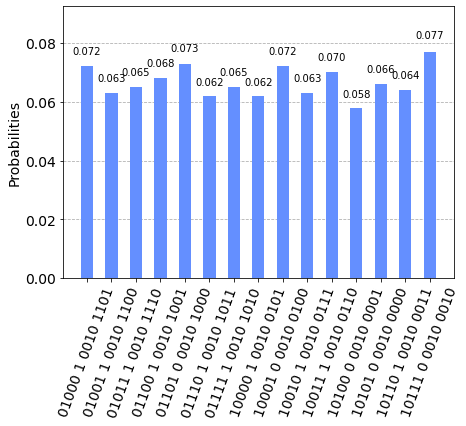

In [27]:
datax = [0,0,0,0,1,1,1,1,2,2,2,3,3,3,3]
datay = [0,1,2,3,0,1,2,3,0,1,3,0,1,2,3]
labels = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0]

testPointx = bin2decimal('1010')

start=time.time()
xi = testPointx ## point 3,3
# xi = 3

#fx = lambda x, y: [bin2decimal(binary(x[i], 1) + binary(y[i], n)) for i in range(len(x))]
#training = fx(labels, datax)
fxy = lambda x, y, z: [bin2decimal(binary(x[i], 1) + binary(y[i], 2) + binary(z[i], 2)) for i in range(len(x))]
training = fxy(labels, datax, datay)

#m = len(bin(t)) - 2
## test point
qx = QuantumRegister(n, "qx")
## data
qa = QuantumRegister(n+1, "qa")
## labels
#qb = QuantumRegister(1, "qb")
qt = QuantumRegister(n, "qt")
qanc = QuantumRegister(1, "qanc")
cx = ClassicalRegister(n, "cx")
ca = ClassicalRegister(n+1, "ca")
#cb = ClassicalRegister(1, "cb")
ct = ClassicalRegister(n, "ct")
canc = ClassicalRegister(1,  "canc")


circ = QuantumCircuit(qx, qt, qanc, qa, cx, ct, canc, ca)
circ.reset(range(3*n+1+1))

####### add input for test point
testpoint = binary(xi, n)[::-1]
for i in range(len(testpoint)):
    if testpoint[i] == '1':
        circ.x(qx[i])
tpoint = binary(t, n)[::-1]
for i in range(len(testpoint)):
    if tpoint[i] == '1':
        circ.x(qt[i])

sv = superposition(training, n+1)
circ.initialize(sv.data, qa)
circ.barrier()

distCal(circ, qa[:-1], qx)
circ.barrier()
uf(circ, 2*n + 1, t, n)
#hammingDist(circ, qx, qt, qanc)
circ.barrier()

# circ.x(qanc)
circ.barrier()

circ.measure(qanc, canc)
circ.measure(qa, ca)
circ.measure(qt, ct)
circ.measure(qx, cx)

job = backend.run(assemble(circ), shots=1000, memory=True)
end=time.time()
elasped = end-start
print("The time elasped is:", elasped)
plot_histogram(job.result().get_counts())

In [26]:
datax = [0,0,0,0,1,1,1,1,2,2,2,3,3,3,3]
datay = [0,1,2,3,0,1,2,3,0,1,3,0,1,2,3]
labels = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0]

testPointx = bin2decimal('1010')

startC = time.time()
fxy = lambda x, y: [binary(x[i], int(n/2)) + binary(y[i], int(n/2)) for i in range(len(x))]
training = fxy(datax, datay)

print("The classification is:", cknn(training, labels, testPointx, t, n))
endC=time.time()
elaspedC = endC-startC
print("The time elasped is:", elaspedC)

The classification is: 1
The time elasped is: 0.0006330013275146484
